In [1]:
from keras.models import Sequential
from keras.layers import *
from keras.optimizers import *

import cv2
import numpy as np
import os
from random import shuffle
from tqdm import tqdm
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

train_data = '/Users/arunprakash/Documents/DataSets/ImageData/Vehicles/train'
test_data = '/Users/arunprakash/Documents/DataSets/ImageData/Vehicles/test'

def one_hot_label(img):
    label = img.split('.')[0]
    if label == 'car':
        ohl = np.array([1,0])
    elif label == 'truck':
        ohl = np.array([0,1])
    return ohl
def train_data_with_label():
    train_images = []
    for i in tqdm(os.listdir(train_data)):
        path = os.path.join(train_data, i)
        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (64, 64))
        train_images.append([np.array(img), one_hot_label(i)])
    shuffle(train_images)
    #np.save('train_img_data_ct.npy', train_images)
    return train_images

def test_data_with_label():
    test_images = []
    for i in tqdm(os.listdir(test_data)):
        path = os.path.join(test_data, i)
        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (64, 64))
        test_images.append([np.array(img), one_hot_label(i)])
    #np.save('test_img_data_ct.npy', test_images)
    return test_images
#Load the data
training_images = train_data_with_label()
testing_images = test_data_with_label()

#training_images = np.load('train_img_data.npy')
#testing_images = np.load('test_img_data.npy')

tr_img_data = np.array([i[0] for i in training_images]).reshape(-1,64,64,1)
tr_lbl_data = np.array([i[1] for i in training_images])

tst_img_data = np.array([i[0] for i in testing_images]).reshape(-1,64,64,1)
tst_lbl_data = np.array([i[1] for i in testing_images])

model = Sequential()

model.add(InputLayer(input_shape=[64,64,1]))#keras will internally add batch dimention
model.add(Conv2D(filters=32,kernel_size=5,strides=1,padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=5,padding='same'))

model.add(Conv2D(filters=50,kernel_size=5,strides=1,padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=5,padding='same'))

model.add(Conv2D(filters=80,kernel_size=5,strides=1,padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=5,padding='same'))

model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(2,activation='softmax'))
optimizer = Adam(lr=1e-3)

model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(x=tr_img_data,y=tr_lbl_data,epochs=50,batch_size=100)
model.summary()
loss_and_metrics = model.evaluate(tst_img_data, tst_lbl_data, batch_size=100)
print(loss_and_metrics)







/anaconda3/envs/tfdeeplearningv1.4/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/anaconda3/envs/tfdeeplearningv1.4/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.5
  return f(*args, **kwds)
100%|██████████| 50/50 [00:00<00:00, 1226.33it/s]


Epoch 1/50
200/200 [==============================] - 1s 5ms/step - loss: 6.4655 - acc: 0.4900
Epoch 2/50
200/200 [==============================] - 1s 3ms/step - loss: 5.4087 - acc: 0.5550
Epoch 3/50
200/200 [==============================] - 1s 3ms/step - loss: 5.1782 - acc: 0.5450
Epoch 4/50
200/200 [==============================] - 1s 3ms/step - loss: 4.6723 - acc: 0.5150
Epoch 5/50
200/200 [==============================] - 1s 3ms/step - loss: 4.3615 - acc: 0.5300
Epoch 6/50
200/200 [==============================] - 1s 3ms/step - loss: 3.0372 - acc: 0.5250
Epoch 7/50
200/200 [==============================] - 1s 3ms/step - loss: 2.2047 - acc: 0.5000
Epoch 8/50
200/200 [==============================] - 1s 3ms/step - loss: 1.3344 - acc: 0.4750
Epoch 9/50
200/200 [==============================] - 1s 3ms/step - loss: 0.8874 - acc: 0.5050
Epoch 10/50
200/200 [==============================] - 1s 3ms/step - loss: 0.6862 - acc: 0.6050
Epoch 11/50
200/200 [============================

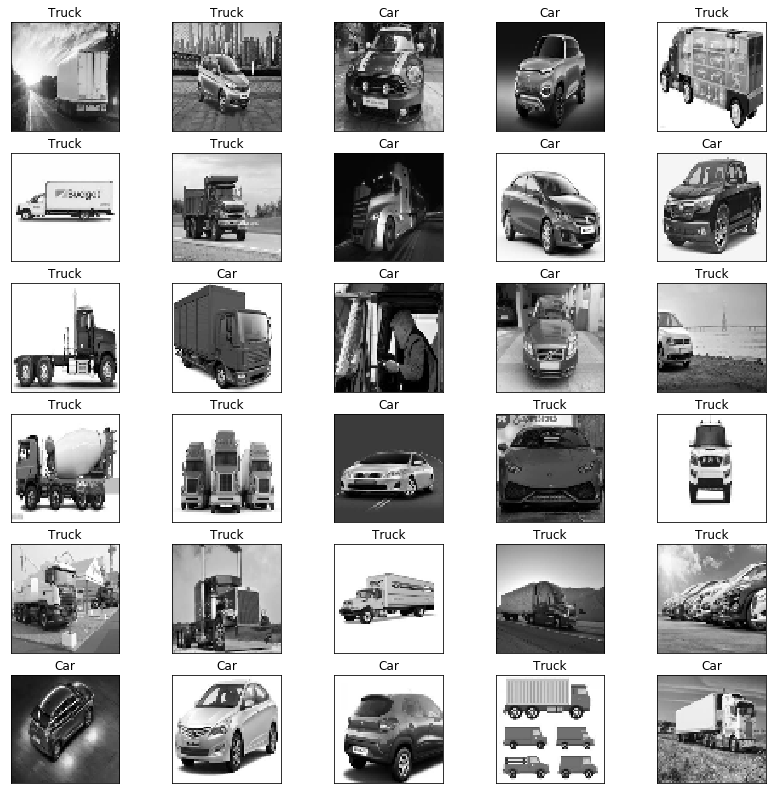

In [43]:
fig=plt.figure(figsize=(14, 14))
pred_images_x_c = []
pred_images_y_c = []
pred_images_x_t = []
pred_images_y_t = []
for cnt, data in enumerate(testing_images[10:40]):

    y = fig.add_subplot(6, 5, cnt+1)
    img = data[0]
    data = img.reshape(1,64, 64,1)
    model_out = model.predict([data])
    
    if np.argmax(model_out) == 1:
        str_label='Truck'
        pred_images_x_t.append(model_out[0][0])
        pred_images_y_t.append(model_out[0][1])
    else:
        str_label='Car'
        pred_images_x_c.append(model_out[0][0])
        pred_images_y_c.append(model_out[0][1])

    y.imshow(img, cmap='gray')
    plt.title(str_label)
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)

In [2]:
pred_images_x_c = []
pred_images_y_c = []
pred_images_x_t = []
pred_images_y_t = []
for cnt, data in enumerate(testing_images):
    img = data[0]
    data = img.reshape(1,64, 64,1)
    model_out = model.predict([data])
    
    if np.argmax(model_out) == 1:
        str_label='Truck'
        pred_images_x_t.append(model_out[0][0])
        pred_images_y_t.append(model_out[0][1])
    else:
        str_label='Car'
        pred_images_x_c.append(model_out[0][0])
        pred_images_y_c.append(model_out[0][1])

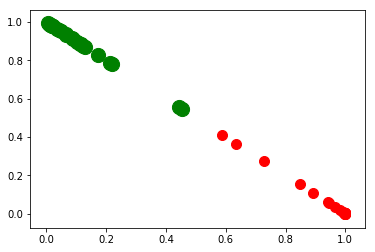

In [3]:
plt.scatter(pred_images_x_c,pred_images_y_c,color='r',s=100)
plt.scatter(pred_images_x_t,pred_images_y_t,color='g',s=200)